### SLR, Lasso, Ridge, MLR with OLS with statsmodels.api

## Agenda

* Perform basic EDA
* Scale data and apply Linear, Ridge & Lasso Regression with Regularization 
* Compare the r^2 score to determine which of the above regression methods gives the highest score
* Compute Root mean squared error (RMSE) which inturn gives a better score than r^2
* Finally use a scatter plot to graphically depict the correlation between actual and predicted mpg values

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [2]:
dataset = pd.read_csv(r'C:\Users\USER\Documents\Python\Nareshit data analysis\stats and ML\ML\27th- l1, l2, scaling\lasso, ridge, elastic net\TASK-22_LASSO,RIDGE\car-mpg.csv')

In [3]:
dataset.head(2)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320


In [4]:
dataset.nunique()

mpg         129
cyl           5
disp         82
hp           94
wt          351
acc          96
yr           14
origin        3
car_type      2
car_name    305
dtype: int64

In [5]:
dataset.shape

(398, 10)

In [6]:
dataset.origin.unique()

array([1, 3, 2], dtype=int64)

In [7]:
dataset.origin.value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

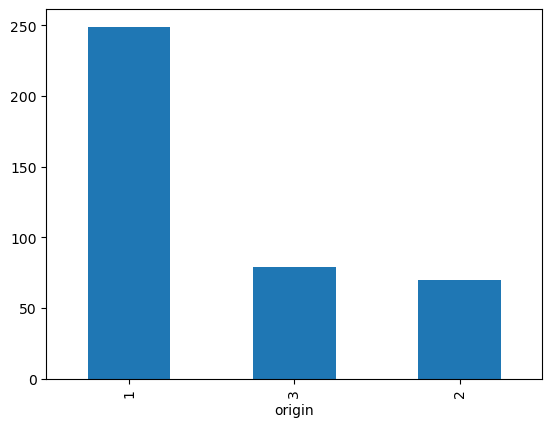

In [8]:
dataset['origin'].value_counts().plot(kind='bar')
plt.show()

In [9]:
# Find out if any cell contains any discrepancy, ie, unwanted special characters.
import re

def find_special_chars(series):
    return series[series.astype(str).str.contains(r'[^a-zA-Z0-9\s.]', regex=True, na=False)]

# Check each column
special_chars_found = {col: find_special_chars(dataset[col]) for col in dataset.columns}

# Display results
for col, values in special_chars_found.items():
    if not values.empty:
        print(f"Column '{col}' contains special characters in the following rows:")
        print(values, "\n")

Column 'hp' contains special characters in the following rows:
32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: hp, dtype: object 

Column 'acc' contains special characters in the following rows:
28    18.5!
Name: acc, dtype: object 

Column 'yr' contains special characters in the following rows:
34    !71
Name: yr, dtype: object 

Column 'car_name' contains special characters in the following rows:
11                       plymouth 'cuda 340
13                  buick estate wagon (sw)
23                                bmw 2002?
42                        dodge monaco (sw)
43                 ford country squire (sw)
44                      pontiac safari (sw)
45               amc hornet sportabout (sw)
46                      chevrolet vega (sw)
72                         amc matador (sw)
73         chevrolet chevelle concours (sw)
74                    ford gran torino (sw)
75           plymouth satellite custom (sw)
76                          volvo 145e (sw)
77            

In [10]:
dataset = dataset.drop('car_name',axis=1)

In [11]:
#replace these special charecters with nothing
dataset = dataset.replace(r'[?!]', "",regex=True)

#one liner
# dataset = dataset.replace(r'[?!]', "", regex=True).replace(r'^\s*$', np.nan, regex=True)

In [12]:
# If any cell contains only special characters, it will include 'NaN' and will not appear as an empty cell, so use the code below.
dataset = dataset.replace(r'^\s*$', np.nan, regex=True)

In [13]:
dataset.isnull().sum()

mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car_type    0
dtype: int64

In [14]:
dataset['hp'] = dataset['hp'].fillna(np.mean(pd.to_numeric(dataset['hp'])))

In [15]:
dataset['hp'].loc[[32,126,330]]

32     104.469388
126    104.469388
330    104.469388
Name: hp, dtype: object

In [16]:
dataset['origin'] = dataset['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [17]:
dataset.head(3)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12,70,america,0
1,15.0,8,350.0,165,3693,11.5,70,america,0
2,18.0,8,318.0,150,3436,11,70,america,0


In [18]:
dataset = pd.get_dummies(dataset, columns=['origin'],dtype=int)

In [19]:
dataset.head(2)

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0


In [20]:
# split IV and DV
x = dataset.drop('mpg',axis=1)
# y=dataset['mpg']   -- it makes series
y = dataset[['mpg']]    #it gives dataframe

In [21]:
x

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,8,307.0,130,3504,12,70,0,1,0,0
1,8,350.0,165,3693,11.5,70,0,1,0,0
2,8,318.0,150,3436,11,70,0,1,0,0
3,8,304.0,150,3433,12,70,0,1,0,0
4,8,302.0,140,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1,1,0,0
394,4,97.0,52,2130,24.6,82,1,0,0,1
395,4,135.0,84,2295,11.6,82,1,1,0,0
396,4,120.0,79,2625,18.6,82,1,1,0,0


In [22]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [23]:
x_s = preprocessing.scale(x)
x_s

array([[ 1.49819126,  1.0906037 ,  0.66919608, ...,  0.77355903,
        -0.49764335, -0.46196822],
       [ 1.49819126,  1.5035143 ,  1.58659918, ...,  0.77355903,
        -0.49764335, -0.46196822],
       [ 1.49819126,  1.19623199,  1.19342642, ...,  0.77355903,
        -0.49764335, -0.46196822],
       ...,
       [-0.85632057, -0.56103873, -0.53653371, ...,  0.77355903,
        -0.49764335, -0.46196822],
       [-0.85632057, -0.70507731, -0.66759129, ...,  0.77355903,
        -0.49764335, -0.46196822],
       [-0.85632057, -0.71467988, -0.58895674, ...,  0.77355903,
        -0.49764335, -0.46196822]])

In [24]:
x_s = pd.DataFrame(x_s, columns=x.columns)

In [25]:
x_s

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.484111,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.497643,-0.461968
394,-0.856321,-0.925936,-1.375302,-0.993671,3.279296,1.621983,0.941412,-1.292726,-0.497643,2.164651
395,-0.856321,-0.561039,-0.536534,-0.798585,-1.440730,1.621983,0.941412,0.773559,-0.497643,-0.461968
396,-0.856321,-0.705077,-0.667591,-0.408411,1.100822,1.621983,0.941412,0.773559,-0.497643,-0.461968


In [26]:
y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s, columns=y.columns)

In [27]:
# train_test_ratio

x_train, x_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.3,random_state=0)

## 2.a Simple Regression model

In [28]:
SRM_regression = LinearRegression()
SRM_regression.fit(x_train, y_train)



LinearRegression()

In [29]:
for idx, col_name in enumerate(x_train.columns):
    print(f'The coefficient of {col_name} is {SRM_regression.coef_[0][idx]}')

intercept = SRM_regression.intercept_[0]
print('\nThe intecept is {}'.format(intercept))

The coefficient of cyl is 0.24677208397946127
The coefficient of disp is 0.2863056935442587
The coefficient of hp is -0.18684983308257003
The coefficient of wt is -0.6739251256490633
The coefficient of acc is 0.06866273093125891
The coefficient of yr is 0.34499212991725675
The coefficient of car_type is 0.31499039886013663
The coefficient of origin_america is -0.07597185958473313
The coefficient of origin_asia is 0.06258574725985531
The coefficient of origin_europe is 0.031004893345989274

The intecept is -0.019293058407996007


## 2.b Regularized Ridge Regression

In [30]:
from sklearn.linear_model import RidgeCV

# Define a range of alpha values to test
alpha_values = np.linspace(0.01, 100, 10000)

# RidgeCV automatically selects the best alpha
ridge_cv = RidgeCV(alphas=alpha_values, store_cv_results=True)
ridge_cv.fit(x_train, y_train)

# Best alpha selected
best_alpha = ridge_cv.alpha_
print("Optimal alpha:", best_alpha)


Optimal alpha: 1.9000000000000001


In [31]:
ridge_model1 = Ridge(alpha=1.9)
ridge_model1.fit(x_train,y_train)

print('The coefficient is {}'.format(ridge_model1.coef_))
print(f'\nThe intercept is {ridge_model1.intercept_}')

The coefficient is [ 0.2257407   0.23202537 -0.18667413 -0.62409545  0.05911351  0.34092218
  0.29569302 -0.07384612  0.0625613   0.02832831]

The intercept is [-0.01940078]


In [32]:
ridge_model = Ridge(alpha=0.3)
ridge_model.fit(x_train,y_train)

print('The coefficient is {}'.format(ridge_model.coef_))
print(f'\nThe intercept is {ridge_model.intercept_}')

The coefficient is [ 0.24356567  0.27652045 -0.18684408 -0.66525534  0.06697358  0.34431108
  0.31178929 -0.07557642  0.06256416  0.03052483]

The intercept is [-0.01931506]


## 2.c Regularized Lasso Regression

In [33]:
from sklearn.linear_model import LassoCV

# Generate a range of alpha values from 0.01 to 100
alpha_values = np.linspace(0.01, 100, 1000)

# LassoCV automatically selects the best alpha
lasso_cv = LassoCV(alphas=alpha_values, cv=5)  # 5-fold cross-validation
lasso_cv.fit(x_train, y_train.values.ravel())

# Best alpha selected
best_alpha = lasso_cv.alpha_
print("Optimal alpha for Lasso:", best_alpha)


Optimal alpha for Lasso: 0.01


In [34]:
lasso_model1 = Lasso(alpha=0.01)
lasso_model1.fit(x_train,y_train)

print(f'The coefficients are {lasso_model1.coef_}')
print(f'The intercept is {lasso_model1.intercept_}')

The coefficients are [ 0.12457168  0.0332703  -0.10692086 -0.53083026  0.03358718  0.33559463
  0.18947784 -0.07867542  0.02857791  0.        ]
The intercept is [-0.01892409]


In [35]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)

print(f'The coefficients are {lasso_model.coef_}')
print(f'The intercept is {lasso_model.intercept_}')

The coefficients are [-0.         -0.         -0.06415988 -0.4819286   0.          0.27134901
  0.09663541 -0.03456389  0.          0.        ]
The intercept is [-0.01644348]


## 2.d MLR-OLS

In [51]:
X_S = preprocessing.scale(x)
X_S = pd.DataFrame(X_S, columns=x.columns)
Y_S = preprocessing.scale(y)
Y_S = pd.DataFrame(Y_S, columns=y.columns)

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X_S, Y_S, test_size=0.3,random_state=0)

In [53]:
SRM_regression_OLS = LinearRegression()
SRM_regression_OLS.fit(X_train,Y_train)

LinearRegression()

In [54]:
M = SRM_regression_OLS.coef_
print(M)
C = SRM_regression_OLS.intercept_
print(C)

[[ 0.24677208  0.28630569 -0.18684983 -0.67392513  0.06866273  0.34499213
   0.3149904  -0.07597186  0.06258575  0.03100489]]
[-0.01929306]


In [55]:
X_S = np.append(arr=np.full((398,1),-0.01929306).astype(int),values=X_S,axis=1)

In [57]:
# Convert X_ols back to DataFrame with column names
X_S = pd.DataFrame(X_S, columns=['Intercept'] + list(x_s.columns))

In [58]:
# Function to perform OLS and return results
def perform_ols(X, y):
    model = sm.OLS(y, X).fit()
    return model

# Start feature elimination process
def feature_elimination(X, y, threshold=0.05):
    iteration = 1
    while True:
        print(f"\n🔄 Iteration {iteration}...")
        
        # Perform OLS and get results
        model = perform_ols(X, y)
        print(model.summary())
        
        # Get p-values from the model summary
        p_values = model.pvalues
        
        # Check if all p-values are below threshold (default 0.05)
        if (p_values > threshold).sum() == 0:
            print("\n✅ All variables have p-value < 0.05. Stopping feature elimination.")
            break
        
        # Get the variable with the highest p-value
        highest_p_value = p_values.idxmax()  # Get variable with highest p-value
        max_p_value = p_values.max()  # Get highest p-value value
        
        # If highest p-value is greater than threshold, drop the variable
        if max_p_value > threshold:
            print(f"\n❌ Removing variable '{highest_p_value}' with p-value = {max_p_value:.4f}")
            X = X.drop(columns=highest_p_value)
        else:
            print("\n✅ No more variables to remove.")
            break
        
        iteration += 1

    return model


In [59]:
final_model = feature_elimination(X_S, Y_S)

# Print final model summary
print("\n📊 Final OLS Model after feature elimination:")
print(final_model.summary())



🔄 Iteration 1...
                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.838
Method:                 Least Squares   F-statistic:                              228.9
Date:                Fri, 04 Apr 2025   Prob (F-statistic):                   1.87e-149
Time:                        13:09:06   Log-Likelihood:                         -198.57
No. Observations:                 398   AIC:                                      415.1
Df Residuals:                     389   BIC:                                      451.0
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [61]:
# Use only the final selected features
final_X = X_S[final_model.pvalues.index]  # Keeping only significant features

# Retrain the final model with only selected features
final_regressor = sm.OLS(endog=Y_S, exog=final_X).fit()

# Print the final model summary
print("\n📊 Final Optimized OLS Model:")
print(final_regressor.summary())



📊 Final Optimized OLS Model:
                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.837
Method:                 Least Squares   F-statistic:                              257.3
Date:                Fri, 04 Apr 2025   Prob (F-statistic):                   1.99e-150
Time:                        13:11:24   Log-Likelihood:                         -199.15
No. Observations:                 398   AIC:                                      414.3
Df Residuals:                     390   BIC:                                      446.2
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------

In [70]:
final_X

,Intercept,cyl,disp,hp,wt,yr,car_type,origin_america,origin_asia,origin_europe
0,0.0,1.498191,1.090604,0.669196,0.630870,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,0.0,1.498191,1.503514,1.586599,0.854333,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,0.0,1.498191,1.196232,1.193426,0.550470,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,0.0,1.498191,1.061796,1.193426,0.546923,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,0.0,1.498191,1.042591,0.931311,0.565841,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
...,...,...,...,...,...,...,...,...,...,...
393,0.0,-0.856321,-0.513026,-0.484111,-0.213324,1.621983,0.941412,0.773559,-0.497643,-0.461968
394,0.0,-0.856321,-0.925936,-1.375302,-0.993671,1.621983,0.941412,-1.292726,-0.497643,2.164651
395,0.0,-0.856321,-0.561039,-0.536534,-0.798585,1.621983,0.941412,0.773559,-0.497643,-0.461968
396,0.0,-0.856321,-0.705077,-0.667591,-0.408411,1.621983,0.941412,0.773559,-0.497643,-0.461968


In [75]:
X_train_ols, X_test_ols, Y_train_ols, Y_test_ols = train_test_split(final_X, Y_S, test_size=0.3,random_state=0)

In [76]:
SRM_regression_OLS_1 = LinearRegression()
SRM_regression_OLS_1.fit(X_train_ols,Y_train_ols)

LinearRegression()

# 3. Score Comparison

In [77]:
#Simple Linear Model
print('Performance of Simple regression model')
print(SRM_regression.score(x_train, y_train))
print(SRM_regression.score(x_test, y_test))

print('*************************')
#Ridge
print('Performance of Ridge with optimal alfa=1.9')
print(ridge_model1.score(x_train, y_train))
print(ridge_model1.score(x_test, y_test))

print('*************************')
print('Performance of Ridge with alfa=0.3')
#Ridge
print(ridge_model.score(x_train, y_train))
print(ridge_model.score(x_test, y_test))

print('*************************')
print('Performance of Lasso with optimal alfa=0.01')
#Lasso
print(lasso_model1.score(x_train, y_train))
print(lasso_model1.score(x_test, y_test))
print('*************************')
print('Performance of Lasso with optimal alfa=0.1')
#Lasso
print(lasso_model.score(x_train, y_train))
print(lasso_model.score(x_test, y_test))
print('*************************')
print('Performance of MLR-OLS')
print(SRM_regression_OLS_1.score(X_train_ols, Y_train_ols))
print(SRM_regression_OLS_1.score(X_test_ols, Y_test_ols))

Performance of Simple regression model
0.8362188312805416
0.8432387089546054
*************************
Performance of Ridge with optimal alfa=1.9
0.8358248412623543
0.8419937225583051
*************************
Performance of Ridge with alfa=0.3
0.8362070804741186
0.8430716548484019
*************************
Performance of Lasso with optimal alfa=0.01
0.8279627621776732
0.8372681533412796
*************************
Performance of Lasso with optimal alfa=0.1
0.7995710843890599
0.8098679915665641
*************************
Performance of MLR-OLS
0.8343751050840323
0.8473074297977883


In [62]:
# Make predictions using the optimized model
Y_pred = final_regressor.predict(final_X)
# Compute mean and standard deviation of original y before scaling
Y_mean = dataset['mpg'].mean()
Y_std = dataset['mpg'].std()

# Reverse standardization
Y_pred_original = (Y_pred * Y_std) + Y_mean  # Avoids NaN if std is valid

print("\n📈 Predicted Values (Original Scale):")
print(y_pred_original.head())




📈 Predicted Values (Original Scale):
0    16.232749
1    14.546057
2    16.085600
3    15.823430
4    16.078543
dtype: float64


In [63]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_S, Y_pred)
print("\n📊 Mean Squared Error (MSE):", mse)



📊 Mean Squared Error (MSE): 0.15927510128881256


In [65]:
# R-squared for training data
print("R-squared on training set:", final_regressor.rsquared)

# R-squared adjusted for number of predictors
print("Adjusted R-squared:", final_regressor.rsquared_adj)

R-squared on training set: 0.8407248987111874
Adjusted R-squared: 0.8374577171462887


In [68]:
# Ensure x_test has the same features as the final model
# x_test_selected = x_test[final_regressor.model.exog_names]  # Keep only selected features
final_X = X_S[final_model.pvalues.index]
# Predict using the final optimized model
Y_test_pred = final_regressor.predict(final_X)

# Compute Test R²
from sklearn.metrics import r2_score
test_r2 = r2_score(Y_S, Y_test_pred)

print("📈 Variance Score (Test R²):", test_r2)


📈 Variance Score (Test R²): 0.8407248987111874


In [48]:
from sklearn.metrics import r2_score

# Training R² (Bias Score)
train_r2 = final_regressor.rsquared
print("📊 Bias Score (Train R²):", train_r2)

# Predict test set values
y_test_pred = final_regressor.predict(x_test)

# Compute Test R² (Variance Score)
test_r2 = r2_score(y_test, y_test_pred)
print("📈 Variance Score (Test R²):", test_r2)

# Interpretation
if train_r2 > 0.9 and test_r2 < 0.6:
    print("⚠️ Possible Overfitting! Model performs well on training data but poorly on test data.")
elif train_r2 < 0.6 and test_r2 < 0.6:
    print("⚠️ Possible Underfitting! Model is too simple and not learning patterns.")
elif abs(train_r2 - test_r2) < 0.1:
    print("✅ Good Model! Bias and variance are balanced.")
else:
    print("🔍 Model needs tuning! Consider feature selection or regularization.")


📊 Bias Score (Train R²): 0.8407248987111874
📈 Variance Score (Test R²): -0.6668937823915051
🔍 Model needs tuning! Consider feature selection or regularization.


In [ ]:
x_test